In [2]:
from torchvision import datasets 
import os
import shutil

# 实例化数据库，没有则取torchvision下载
data_path = r"D:\data\plane"
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) 
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) 



Files already downloaded and verified
Files already downloaded and verified


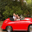

In [19]:
img, label = cifar10[99] 


In [26]:
from torchvision import transforms 
import cv2
to_tensor = transforms.ToTensor() 
img_t = to_tensor(img) 
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, 
 transform=transforms.ToTensor()) 
img_t, _ = tensor_cifar10[99] 
img_t

tensor([[[0.2431, 0.1961, 0.1804,  ..., 0.6549, 0.7176, 0.5373],
         [0.2471, 0.2157, 0.2039,  ..., 0.6392, 0.6706, 0.5686],
         [0.2275, 0.2510, 0.2196,  ..., 0.6000, 0.5882, 0.4824],
         ...,
         [0.6745, 0.5608, 0.5098,  ..., 0.3686, 0.5529, 0.5451],
         [0.7176, 0.5882, 0.3137,  ..., 0.3176, 0.5294, 0.5608],
         [0.8196, 0.7137, 0.5451,  ..., 0.2314, 0.5098, 0.6627]],

        [[0.2510, 0.1961, 0.1725,  ..., 0.6745, 0.7216, 0.5333],
         [0.2549, 0.2078, 0.1961,  ..., 0.6627, 0.6824, 0.5725],
         [0.2431, 0.2588, 0.2353,  ..., 0.6078, 0.6039, 0.5020],
         ...,
         [0.5294, 0.4314, 0.2196,  ..., 0.2941, 0.4235, 0.4118],
         [0.5725, 0.4627, 0.2510,  ..., 0.2824, 0.4627, 0.4902],
         [0.6824, 0.5922, 0.4275,  ..., 0.2118, 0.4667, 0.6118]],

        [[0.1725, 0.1020, 0.0745,  ..., 0.2706, 0.2980, 0.2824],
         [0.1451, 0.1020, 0.1059,  ..., 0.2392, 0.2941, 0.3020],
         [0.1412, 0.1451, 0.1451,  ..., 0.2431, 0.2510, 0.

In [28]:
import torch

# stack（tensors,dim=0,out=None）函数的功能：
# 将若干个张量在dim维度上连接,生成一个扩维的张量，比如说原来你有若干个2维张量，连接可以得到一个3维的张量。
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3) 
# view(3,−1)保留了 3 个通道，并将剩余的所有
# 维度合并为一个维度，从而计算出适当的尺寸大小。这
# 里我们的 3×32×32 的图像被转换成一个 3×1024 的向量，
# 然后对每个通道的 1024 个元素取平均值
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [30]:
# 标准差
imgs.view(3, -1).std(dim=1) 
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616)) 


Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [31]:
transformed_cifar10 = datasets.CIFAR10( 
 data_path, train=True, download=False, 
transform=transforms.Compose([ 
 transforms.ToTensor(), 
 transforms.Normalize((0.4915, 0.4823, 0.4468), 
 (0.2470, 0.2435, 0.2616)) 
]))

In [50]:
# 分类数据集，进行识别
label_map = {0: 0, 2: 1} 
class_names = ['airplane', 'bird'] 
cifar2 = [(img, label_map[label]) 
    for img, label in cifar10 
    if label in [0, 2]] 
cifar2_val = [(img, label_map[label]) 
    for img, label in cifar10_val 
    if label in [0, 2]]

In [64]:
import torch.nn as nn
n_out = 2 
model = nn.Sequential( 
 nn.Linear( 3072, 512, ), #输入层
 nn.Tanh(),  #激活函数
 nn.Linear( 512, n_out, # 输出层，输出类别
 nn.Softmax(dim=1) )#当dim=1时，指的是在维度1上的元素相加等于1。
 ) 

In [81]:
import matplotlib.pyplot as plt
# 读取图像
img, _ = cifar2[0]
# 创建张量转化器
transform=transforms.ToTensor()
# 将plt格式装换成张量格式
img=transform(img)
# img=torch.from_numpy(img)
# plt.imshow(img) 
plt.imshow(img.permute(1, 2, 0)) 

In [4]:
from pickletools import optimize
import torch 
import torch.nn as nn 
from torchvision import transforms 
label_map = {0: 0, 2: 1} 
class_names = ['airplane', 'bird'] 
cifar2 = [(img, label_map[label]) 
    for img, label in cifar10 
    if label in [0, 2]] 
cifar2_val = [(img, label_map[label]) 
    for img, label in cifar10_val 
    if label in [0, 2]]
model = nn.Sequential(
 nn.Linear(3072, 512),
 nn.Tanh(), 
 nn.Linear(512, 2), 
 nn.LogSoftmax(dim=1)) 
learning_rate = 1e-2 
optimizer =torch.optim.SGD(model.parameters(), lr=learning_rate) 
loss_fn = nn.NLLLoss() 
n_epochs = 100 
transform=transforms.ToTensor()
for epoch in range(n_epochs): 
    for img, label in cifar2: 
        img=transform(img)
        out = model(img.view(-1).unsqueeze(0)) 
        loss = loss_fn(out, torch.tensor([label])) 
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step() 
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 1.205304


KeyboardInterrupt: 